### Ella results plots

In [ ]:
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import beta
from collections import Counter
from sklearn.neighbors import KernelDensity

# transparent background
plt.rcParams.update({
    "figure.facecolor":  (0.0, 0.0, 0.0, 0.0),  
    "axes.facecolor":    (0.0, 0.0, 0.0, 0.0),  
})

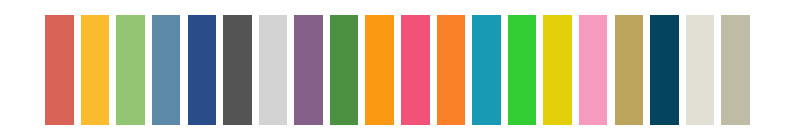

In [2]:
# define colors
purple = '#856088'
pink = '#F25278'
red = '#d96256'
lightgreen = '#93c572'
darkgreen = '#4c9141'
lightblue = '#5d8aa8'
darkblue = '#284d88'
white = '#fafafa'
lightgray = '#d3d3d3'
darkgray ='#545454'
lightorange = '#fabc2e'
darkorange = '#fb9912'
lightyellow = '#e4d00a'
lightgreen2 = '#32CD32'
lightblue2 = '#189AB4'
darkblue2 = '#05445E'
lightpink = '#F79AC0'
darkorange2 = '#FA8128'
darkyellow = '#BDA55D'
lightgray2 = '#E2E0D4'
lightgray3 = '#BFBBA4'

colors = [
    red, lightorange, lightgreen, lightblue, darkblue, 
    darkgray, lightgray, purple, darkgreen, darkorange,
    pink, darkorange2, lightblue2, lightgreen2, lightyellow,
    lightpink, darkyellow, darkblue2, lightgray2, lightgray3
]

plt.figure(figsize=(10, 1.5))
plt.bar(range(len(colors)), height=1, color=colors)
__ = plt.axis('off')

#### load ella results

In [3]:
fn = '../ella/output_ella/ella_seqscope.pkl'
res_dict = pd.read_pickle(fn)
types_list = res_dict['types_list']
genes_dict = res_dict['genes_dict']
cells_dict = res_dict['cells_dict']
kernels_list = res_dict['kernels_list']
p_raw_dict = res_dict['p_raw_dict']
p_combined_dict = res_dict['p_combined_dict']
p_fdr_dict = res_dict['p_fdr_dict']
score_dict = res_dict['score_dict']
lam_dict = res_dict['lam_dict']
label_dict = res_dict['label_dict']
del res_dict

#### number of genes included of each type

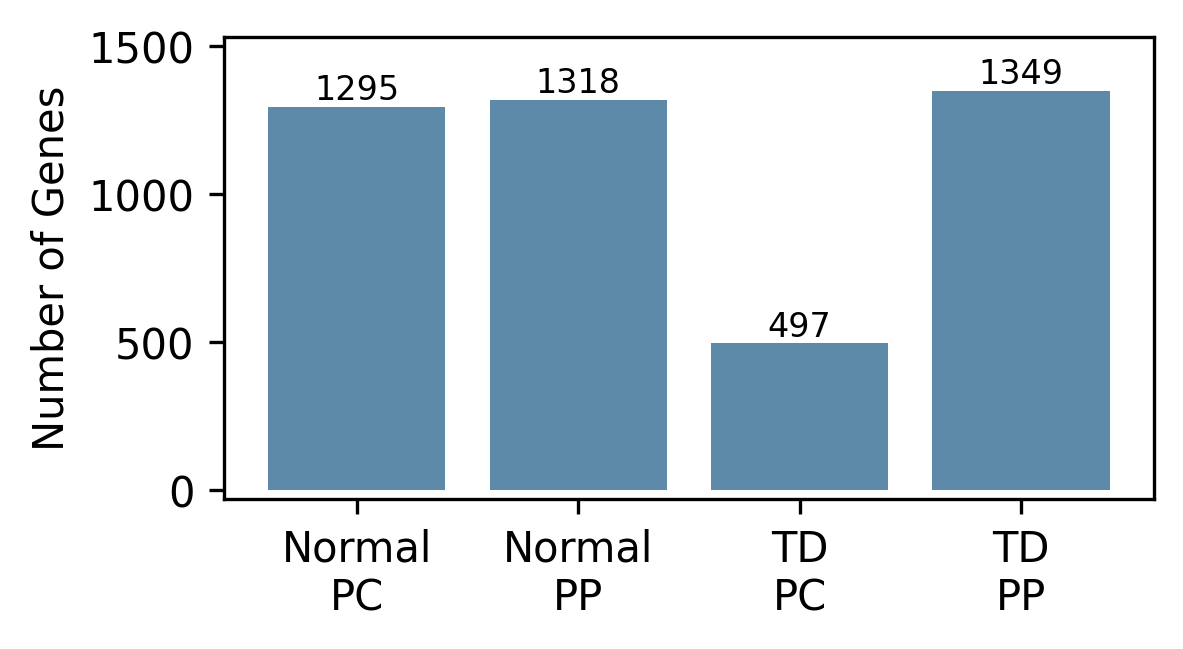

In [4]:
nr = 1
nc = 1
ss_nr = 2
ss_nc = 4
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

tl = types_list
tn = ['Normal\nPC', 'Normal\nPP', 'TD\nPC', 'TD\nPP']
num_genes = []
for t in tl:
    num_genes.append(len(genes_dict[t]))
ax.bar(tn, num_genes, color=lightblue)
ax.set_ylim(-30, 1530)
ax.set_xlim(-0.6, 3.6)
ax.set_yticks([0,500,1000,1500], [0,500,1000,1500])
ax.set_ylabel('Number of Genes')
for i in range(len(tl)):
    plt.text(tn[i], num_genes[i], str(num_genes[i]), ha='center', va='bottom', fontsize=8)

#### number of cells of each type

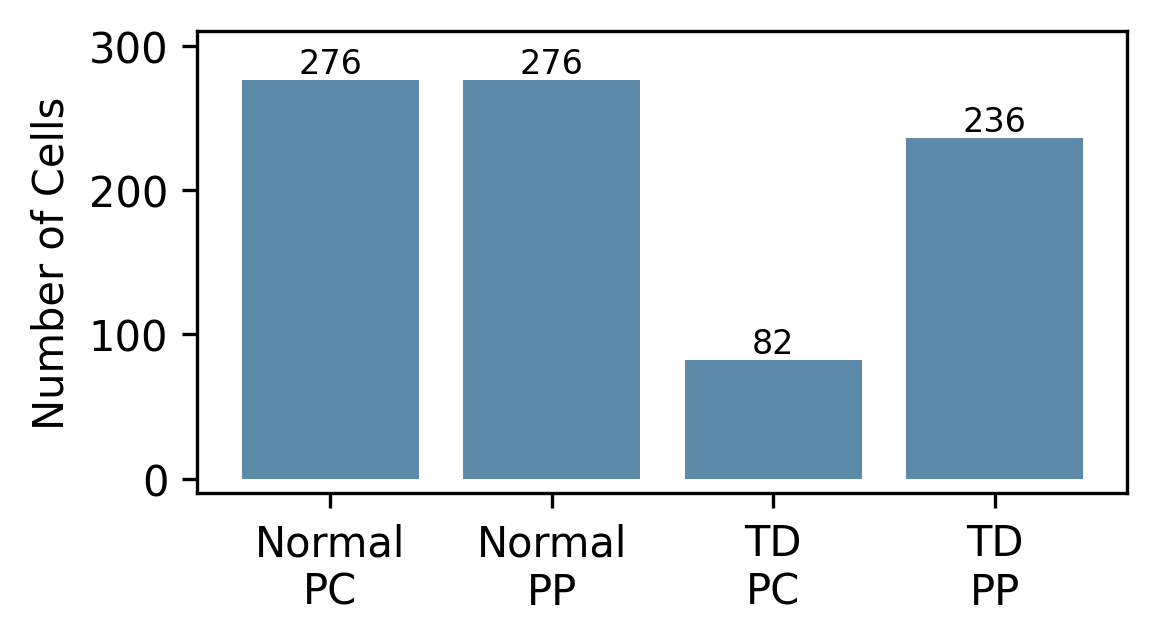

In [5]:
nr = 1
nc = 1
ss_nr = 2
ss_nc = 4
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

tl = types_list
tn = ['Normal\nPC', 'Normal\nPP', 'TD\nPC', 'TD\nPP']
num_cells = []
for t in tl:
    num_cells.append(len(cells_dict[t]))
ax.bar(tn, num_cells, color=lightblue)
ax.set_ylim(-10, 310)
ax.set_xlim(-0.6, 3.6)
ax.set_yticks([0,100,200,300], [0,100,200,300])
ax.set_ylabel('Number of Cells')
for i in range(len(tl)):
    plt.text(tn[i], num_cells[i], str(num_cells[i]), ha='center', va='bottom', fontsize=8)

#### number of sig genes

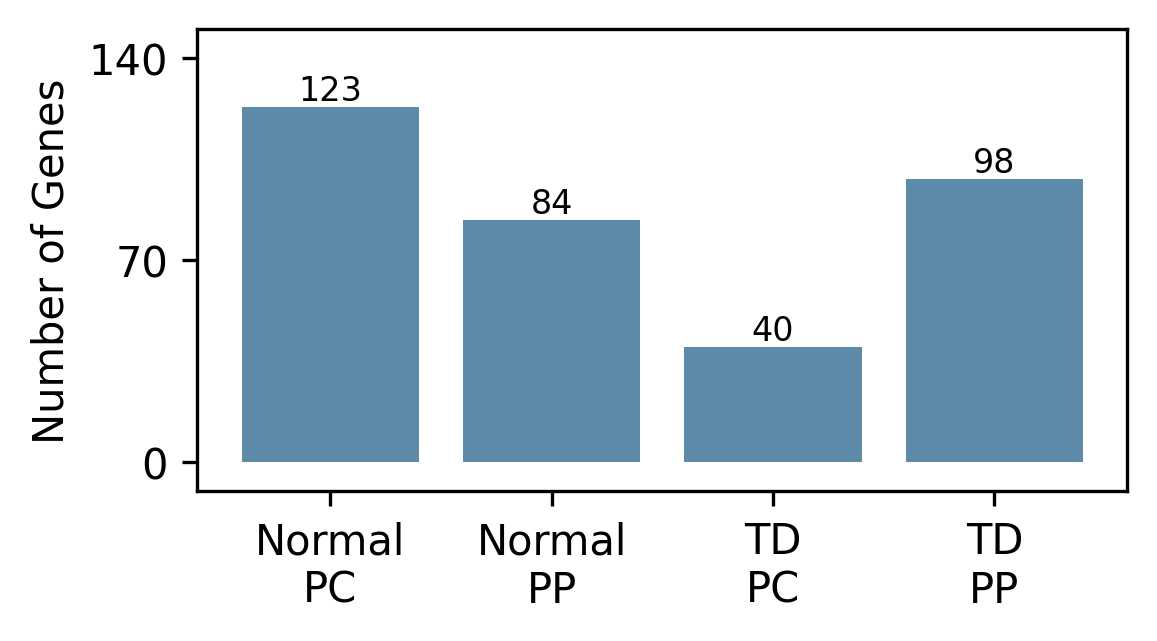

In [6]:
nr = 1
nc = 1
ss_nr = 2
ss_nc = 4
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

tl = types_list
tn = ['Normal\nPC', 'Normal\nPP', 'TD\nPC', 'TD\nPP']
num_sig = []
for t in tl:
    num_sig.append(np.sum(p_fdr_dict[t]<=0.05))
ax.bar(tn, num_sig, color=lightblue)
ax.set_ylim(-10, 150)
ax.set_xlim(-0.6, 3.6)
ax.set_yticks([0,70,140], [0,70,140])
ax.set_ylabel('Number of Genes')
for i in range(len(tl)):
    plt.text(tn[i], num_sig[i], str(num_sig[i]), ha='center', va='bottom', fontsize=8)

#### beta kernels

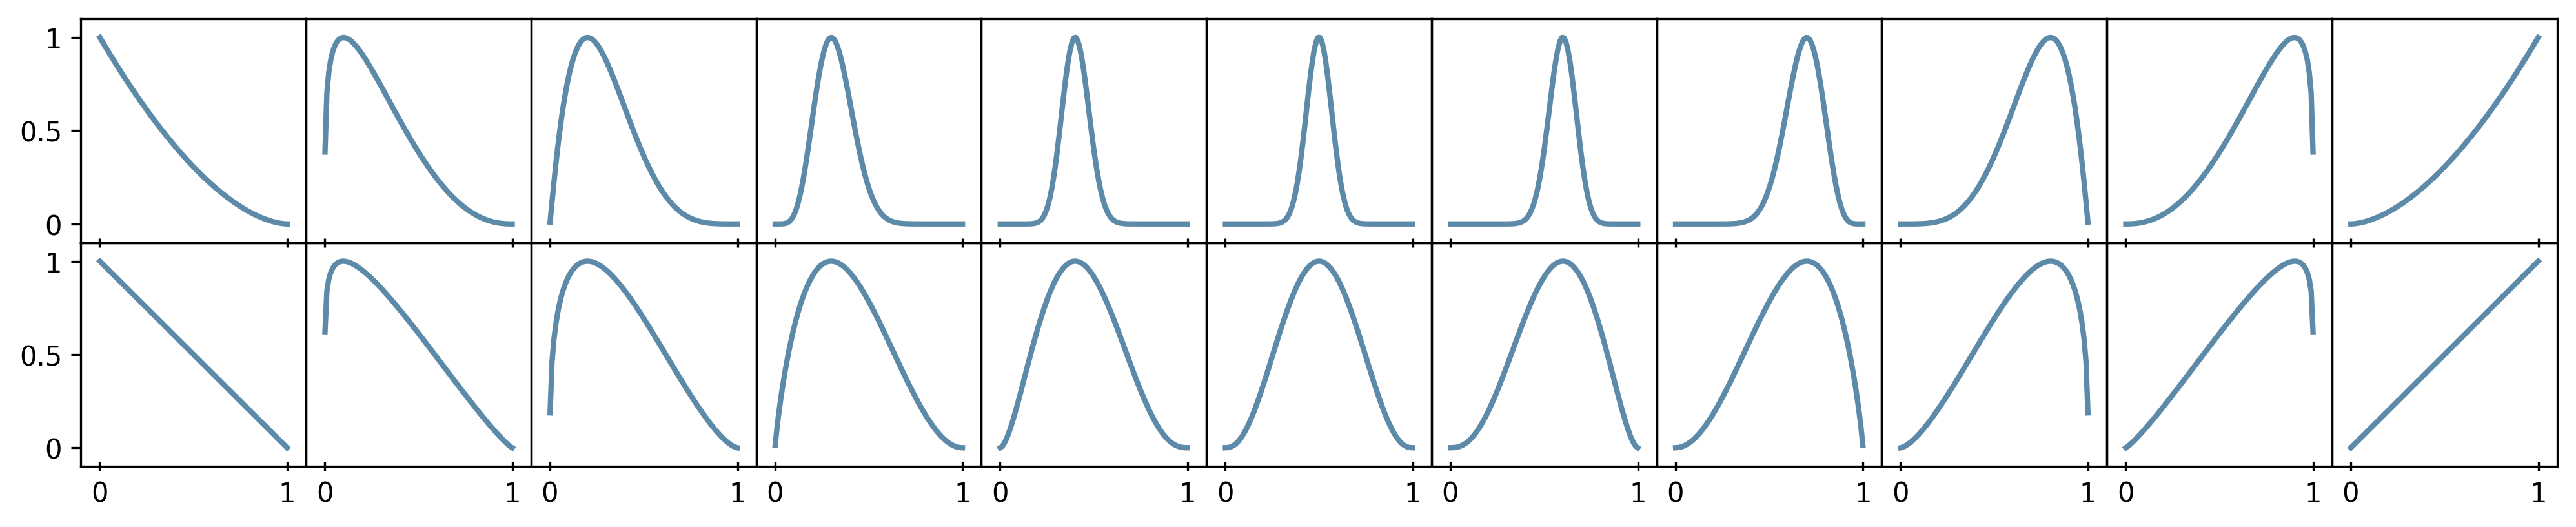

In [7]:
nr = 2
nc = 11
ss_nr = 1.5
ss_nc = 1.5
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)

x = np.linspace(0.001, 0.999, 100)
for i, [a0, b0] in enumerate(kernels_list):
    ax = plt.subplot(gs[i//nc, i%nc])
    y = beta.pdf(x, a0, b0)
    y_std = (y-np.min(y))/(np.max(y)-np.min(y))
    ax.plot(x, y_std, linewidth=2, alpha=1, color=lightblue)
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xticks([0,1], [0,1])
    ax.set_yticks([0,0.5,1], [0,0.5,1])
    if i//nc==0: ax.set_xticks([0,1], ['',''])
    if i%nc !=0: ax.set_yticks([])
    ax.tick_params(axis='x', direction='inout')

#### all cell types together

In [8]:
# merge labels
labels_all = np.concatenate(list(label_dict.values()))
labels_cluster, labels_num = np.unique(labels_all, return_counts=True)
print(labels_cluster)
print(labels_num)

[-1  0  1  2  3  4]
[4114  101   34   86   27   97]


In [9]:
# common genes
genes_all = np.concatenate(list(genes_dict.values()))
genes_all_sig = genes_all[labels_all>-1]

# genes sig in >=2 types
unique_genes, counts = np.unique(genes_all_sig, return_counts=True)
duplicate_genes = unique_genes[counts >= 2]
print(len(duplicate_genes))

77


In [10]:
# find TF in duplicate_elements
fn = 'input/Browse Transcription Factors mm9 - resource_browser.csv'
tab = pd.read_csv(fn)
tf_list = tab.Symbol.unique().tolist()
print(f'total #TF {len(tf_list)}')

list1_lower = [item.lower() for item in tf_list]
list2_lower = [item.lower() for item in duplicate_genes]
common_genes = set(list1_lower).intersection(set(list2_lower))
print(len(common_genes))
print(common_genes)

total #TF 1385
1
{'mlxipl'}


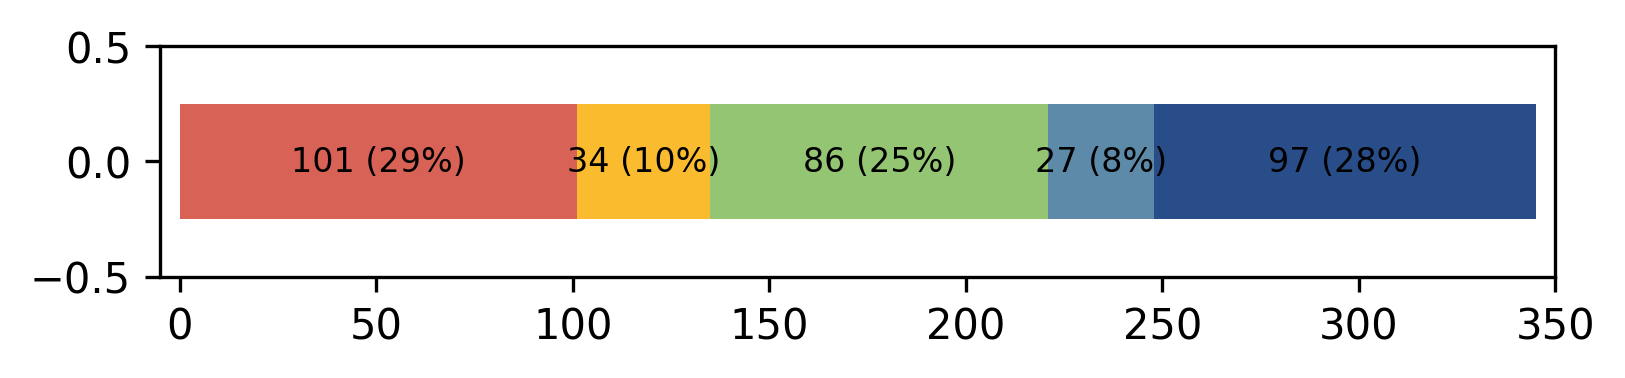

In [11]:
# barplot number of genes
bar_width = 0.5
bar_positions = [0, 1]
colors = [red, lightorange, lightgreen, lightblue, darkblue]

nr = 1
nc = 1
ss_nr = 1
ss_nc = 6
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

# sig genes
labels_num_sig = labels_num[1:]
left = 0
for i in range(5):
    ax.barh(bar_positions[0], labels_num_sig[i], bar_width, left=left, color=colors[i])
    left += labels_num_sig[i]
    ax.text(left - labels_num_sig[i]/2, bar_positions[0], f'{labels_num_sig[i]} ({labels_num_sig[i]/np.sum(labels_num_sig)*100:.0f}%)', fontsize=8, ha='center', va='center', color='black')

ax.set_ylim(-0.5, 0.5)
ax.set_xlim(-5, 350)

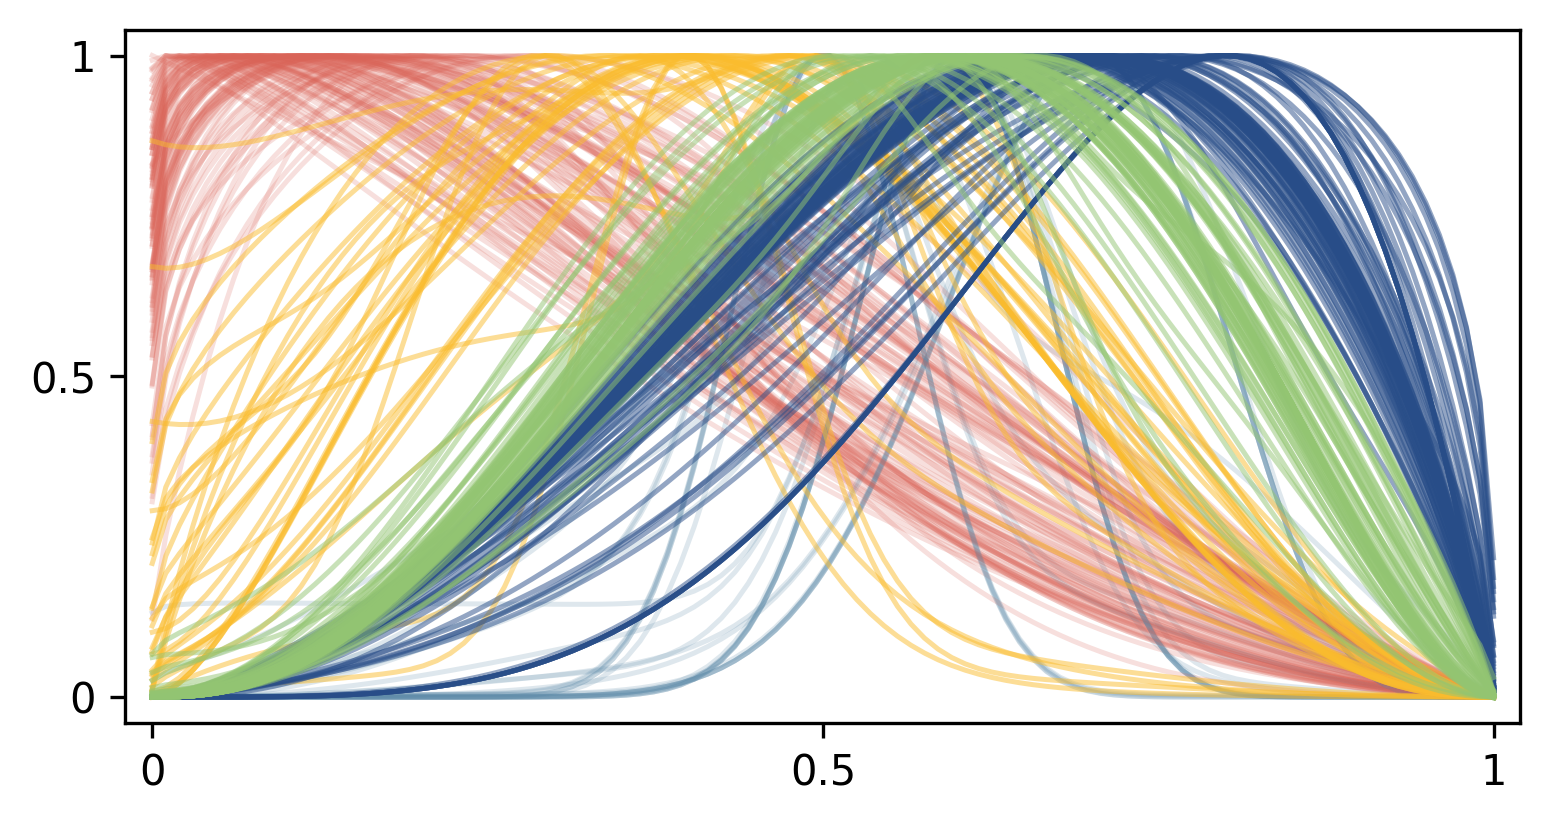

In [12]:
# lam est
x = np.linspace(0, 1, 100)
colors = [red, lightorange, lightgreen, lightblue, darkblue]

nr = 1
nc = 1
ss_nc = 6
ss_nr = 3
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

for t in types_list:
    label_t = label_dict[t]
    lam_t = lam_dict[t]
    gene_t = genes_dict[t]
    for j in range(len(gene_t)):
        l = label_t[j]
        if l>-1:
            color = colors[l]
            if color==lightorange: 
                zorder=2
                alpha=0.5
            elif color==lightgreen: 
                zorder=4
                alpha=0.5
            elif color==darkblue:
                zorder=3
                alpha=0.5
            else: 
                zorder=1
                alpha=0.2
            lam_j = lam_t[j]
            lam_std_j = (lam_j-np.min(lam_j))/(np.max(lam_j)-np.min(lam_j)) # min-max std
            ax.plot(x, lam_std_j, alpha=alpha, lw=1.2, color=color, zorder=zorder)

ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.04, 1.04)
__ = ax.set_xticks([0,0.5,1], [0,0.5,1])
__ = ax.set_yticks([0,0.5,1], [0,0.5,1])

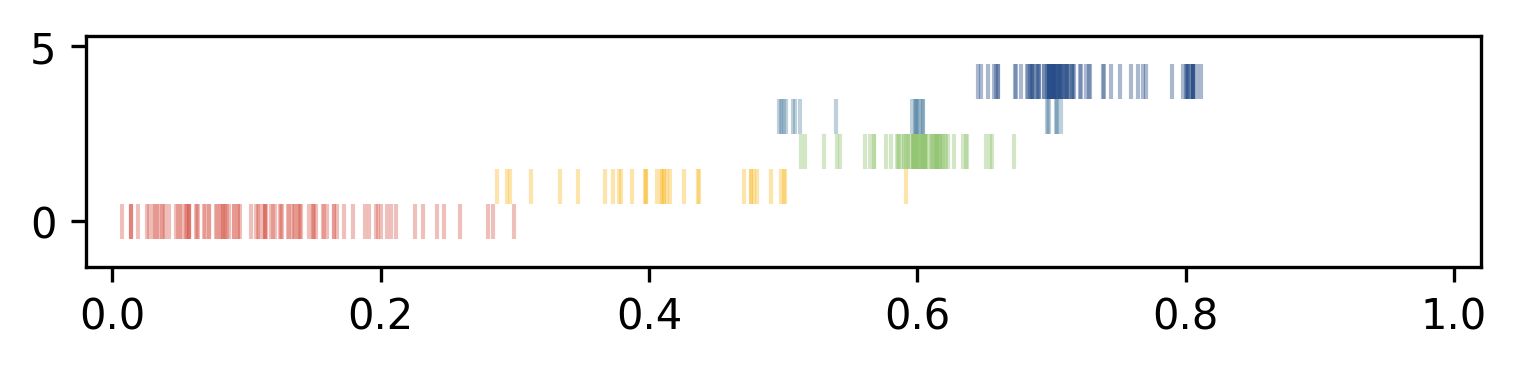

In [13]:
# pattern scores event plot
scores_all = np.concatenate(list(score_dict.values()))
scores_all_sig = scores_all[labels_all>-1]
labels_all_sig = labels_all[labels_all>-1]

colors = [red, lightorange, lightgreen, lightblue, darkblue]

nr = 1
nc = 1
ss_nc = 6
ss_nr = 1
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)
ax = plt.subplot(gs[0, 0])

alpha=0.4
ll=1
lw=1.0

for k in range(5):
    scores_k = scores_all_sig[labels_all_sig==k]
    ax.eventplot([scores_k + np.random.uniform(0, 0.01, len(scores_k))], 
                 orientation='horizontal', 
                 colors=[colors[k]],
                 alpha=alpha,
                 linelengths=ll, lw=lw, lineoffsets=k)

ax.set_xlim(-0.02, 1.02)

#### individual cell types

Text(0.5, 0, 'Number of Genes')

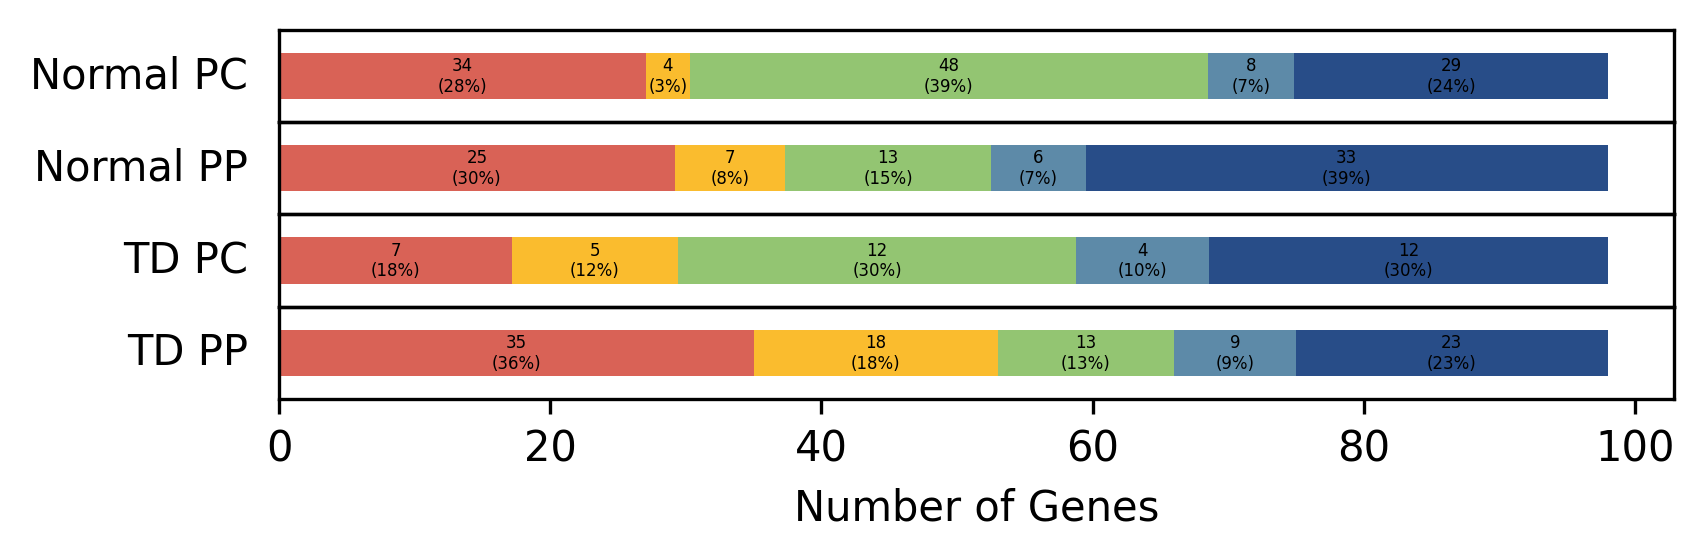

In [31]:
# barplot number of genes
bar_width = 0.5
bar_positions = [0, 1]
colors = [red, lightorange, lightgreen, lightblue, darkblue]
tn = ['Normal PC', 'Normal PP', 'TD PC', 'TD PP']

nr = 4
nc = 1
ss_nr = 0.4
ss_nc = 6
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr, nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)

for j, t in enumerate(types_list):
    ax = plt.subplot(gs[j, 0])
    
    labels_t = label_dict[t]
    labels_cluster_t, labels_num_t = np.unique(labels_t, return_counts=True)
    labels_num_sig_t = labels_num_t[1:]
    
    # sig genes
    left = 0
    for i in range(5):
        ax.barh(bar_positions[0], labels_num_sig_t[i], bar_width, left=left, color=colors[i])
        left += labels_num_sig_t[i]
        ax.text(left - labels_num_sig_t[i]/2, bar_positions[0], f'{labels_num_sig_t[i]}\n({labels_num_sig_t[i]/np.sum(labels_num_sig_t)*100:.0f}%)', fontsize=4, ha='center', va='center', color='black')

    ax.set_ylim(-0.5, 0.5)
    #ax.set_xlim(-2, 125)
    ax.set_yticks([])
    if j!=3: ax.set_xticks([])
    ax.set_ylabel(tn[j], rotation=0, ha='right', va='center')
    
ax.set_xlabel('Number of Genes')

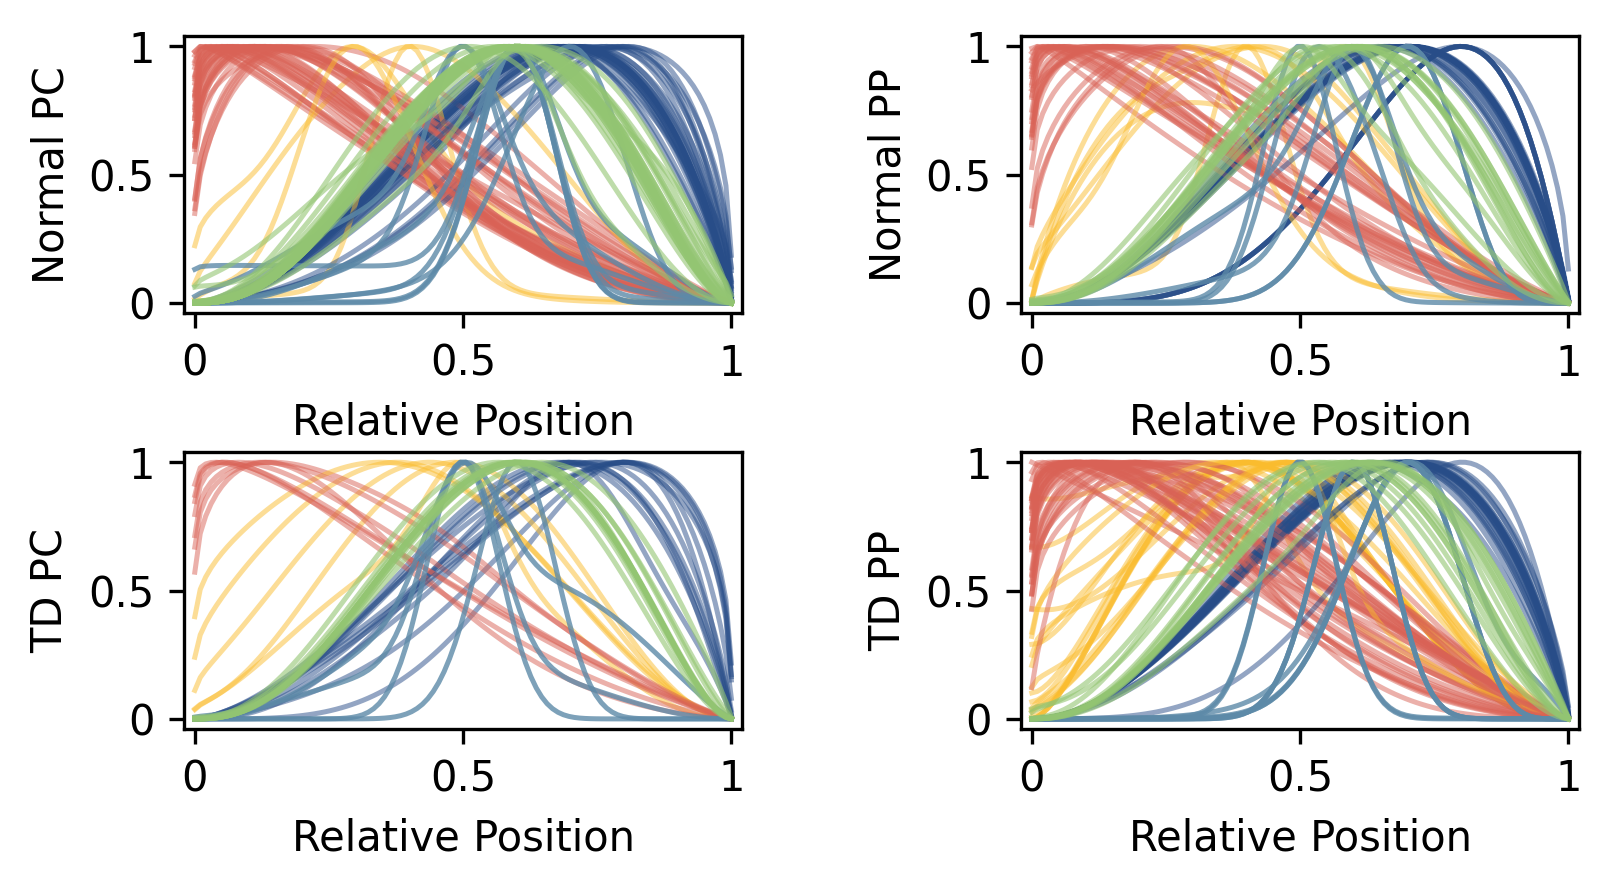

In [15]:
# lam est
x = np.linspace(0, 1, 100)
colors = [red, lightorange, lightgreen, lightblue, darkblue]
tn = ['Normal PC', 'Normal PP', 'TD PC', 'TD PP']

nr = 2
nc = 2
ss_nc = 3
ss_nr = 1.5
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.5, hspace=0.5)

for i, t in enumerate(types_list):
    ax = plt.subplot(gs[i//nc, i%nc])
    
    label_t = label_dict[t]
    lam_t = lam_dict[t]
    gene_t = genes_dict[t]
    
    for j in range(len(gene_t)):
        l = label_t[j]
        if l>-1:
            color = colors[l]
            if color==darkorange: 
                zorder=4
                alpha=0.8
            elif color==lightgreen: 
                zorder=3
                alpha=0.6
            elif color==lightblue:
                zorder=2
                alpha=0.8
            else: 
                zorder=1
                alpha=0.5
            lam_j = lam_t[j]
            lam_std_j = (lam_j-np.min(lam_j))/(np.max(lam_j)-np.min(lam_j)) # min-max std
            ax.plot(x, lam_std_j, alpha=alpha, lw=1.2, color=color, zorder=zorder)

    ax.set_xlim(-0.02, 1.02)
    ax.set_ylim(-0.04, 1.04)
    __ = ax.set_xticks([])
    __ = ax.set_yticks([0,0.5,1], [0,0.5,1])
    ax.set_ylabel(tn[i])    
    __ = ax.set_xticks([0,0.5,1], [0,0.5,1])
    ax.set_xlabel('Relative Position')

Text(0.5, 0, 'Relative Position')

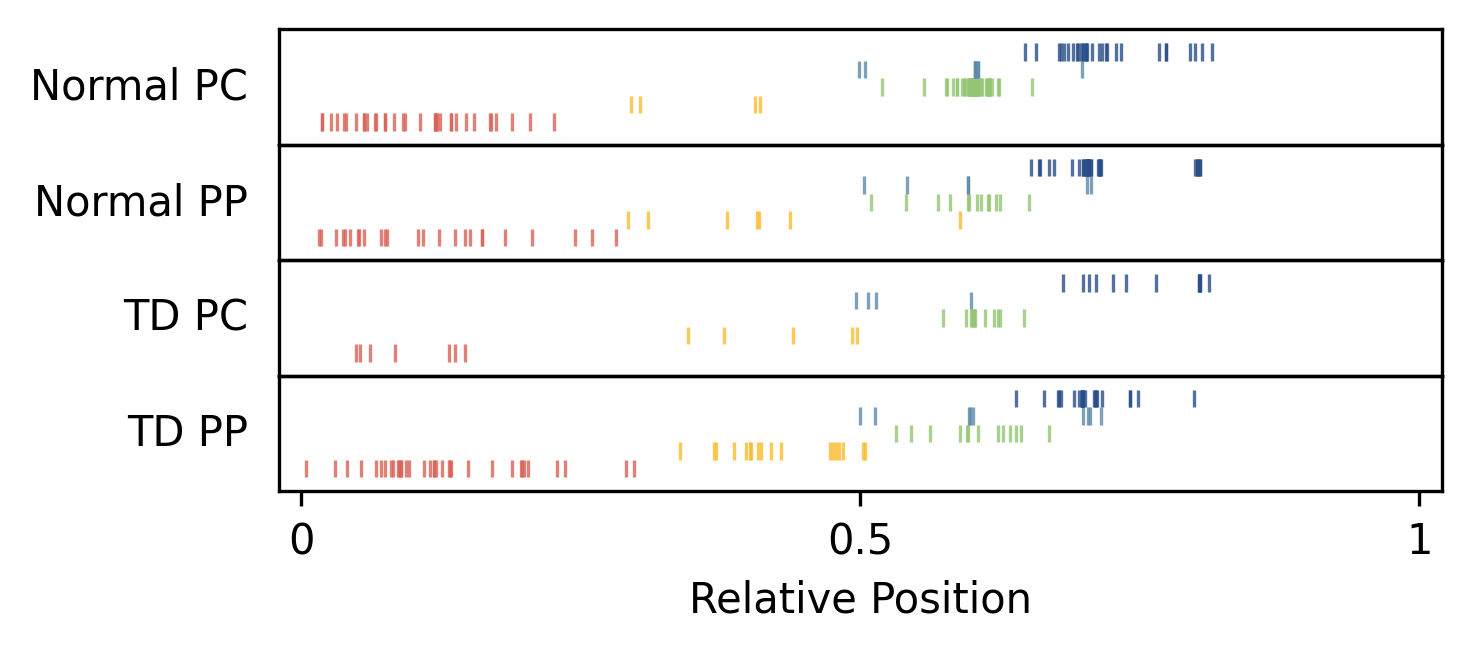

In [33]:
# pattern scores event plot
scores_all = np.concatenate(list(score_dict.values()))
scores_all_sig = scores_all[labels_all>-1]
labels_all_sig = labels_all[labels_all>-1]

colors = [red, lightorange, lightgreen, lightblue, darkblue]

alpha=0.8
ll=1
lw=0.8

nr = 4
nc = 1
ss_nc = 5
ss_nr = 0.5
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.0, hspace=0.0)

for j, t in enumerate(types_list):
    ax = plt.subplot(gs[j, 0])
    
    labels_t = label_dict[t]
    scores_t = score_dict[t]
    labels_sig_t = labels_t[labels_t>-1]
    scores_sig_t = scores_t[labels_t>-1]

    for k in range(5):
        scores_k = scores_sig_t[labels_sig_t==k]
        ax.eventplot([scores_k + np.random.uniform(0, 0.01, len(scores_k))], 
                     orientation='horizontal', 
                     colors=[colors[k]],
                     alpha=alpha,
                     linelengths=ll, lw=lw, lineoffsets=k)

    ax.set_xlim(-0.02, 1.02)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel(tn[j], rotation=0, ha='right', va='center')
    
__ = ax.set_xticks([0,0.5,1], [0,0.5,1])
ax.set_xlabel('Relative Position')

#### details in H1 (normal PC)

In [18]:
# cluster 1 genes
t = 'H1'
genes_t = genes_dict[t]
labels_t = label_dict[t]
genes_c1 = np.array(genes_t)[labels_t==0]
print(f'{len(genes_c1)}')
print(genes_c1)

34
['Sord' 'Slco1b2' 'Apob' 'Acox1' 'Slc7a2' 'n-R5-8s1' 'Ghr' 'Errfi1'
 'Gm24601' 'Cyp2c54' 'C6' 'Egfr' 'Gm13775' 'Mtss1' 'Cpt1a' 'Ppap2b' 'Eci2'
 'Abcc2' 'Abcb4' 'Chd9' 'Mlxipl' 'Malat1' 'Neat1' 'Ccbl2' 'Rapgef4'
 'Slc47a1' 'Echdc2' 'Gckr' 'Pitpnc1' 'Ppara' 'Ddx3x' 'Mafb' 'Nr1d1'
 'Phldb2']


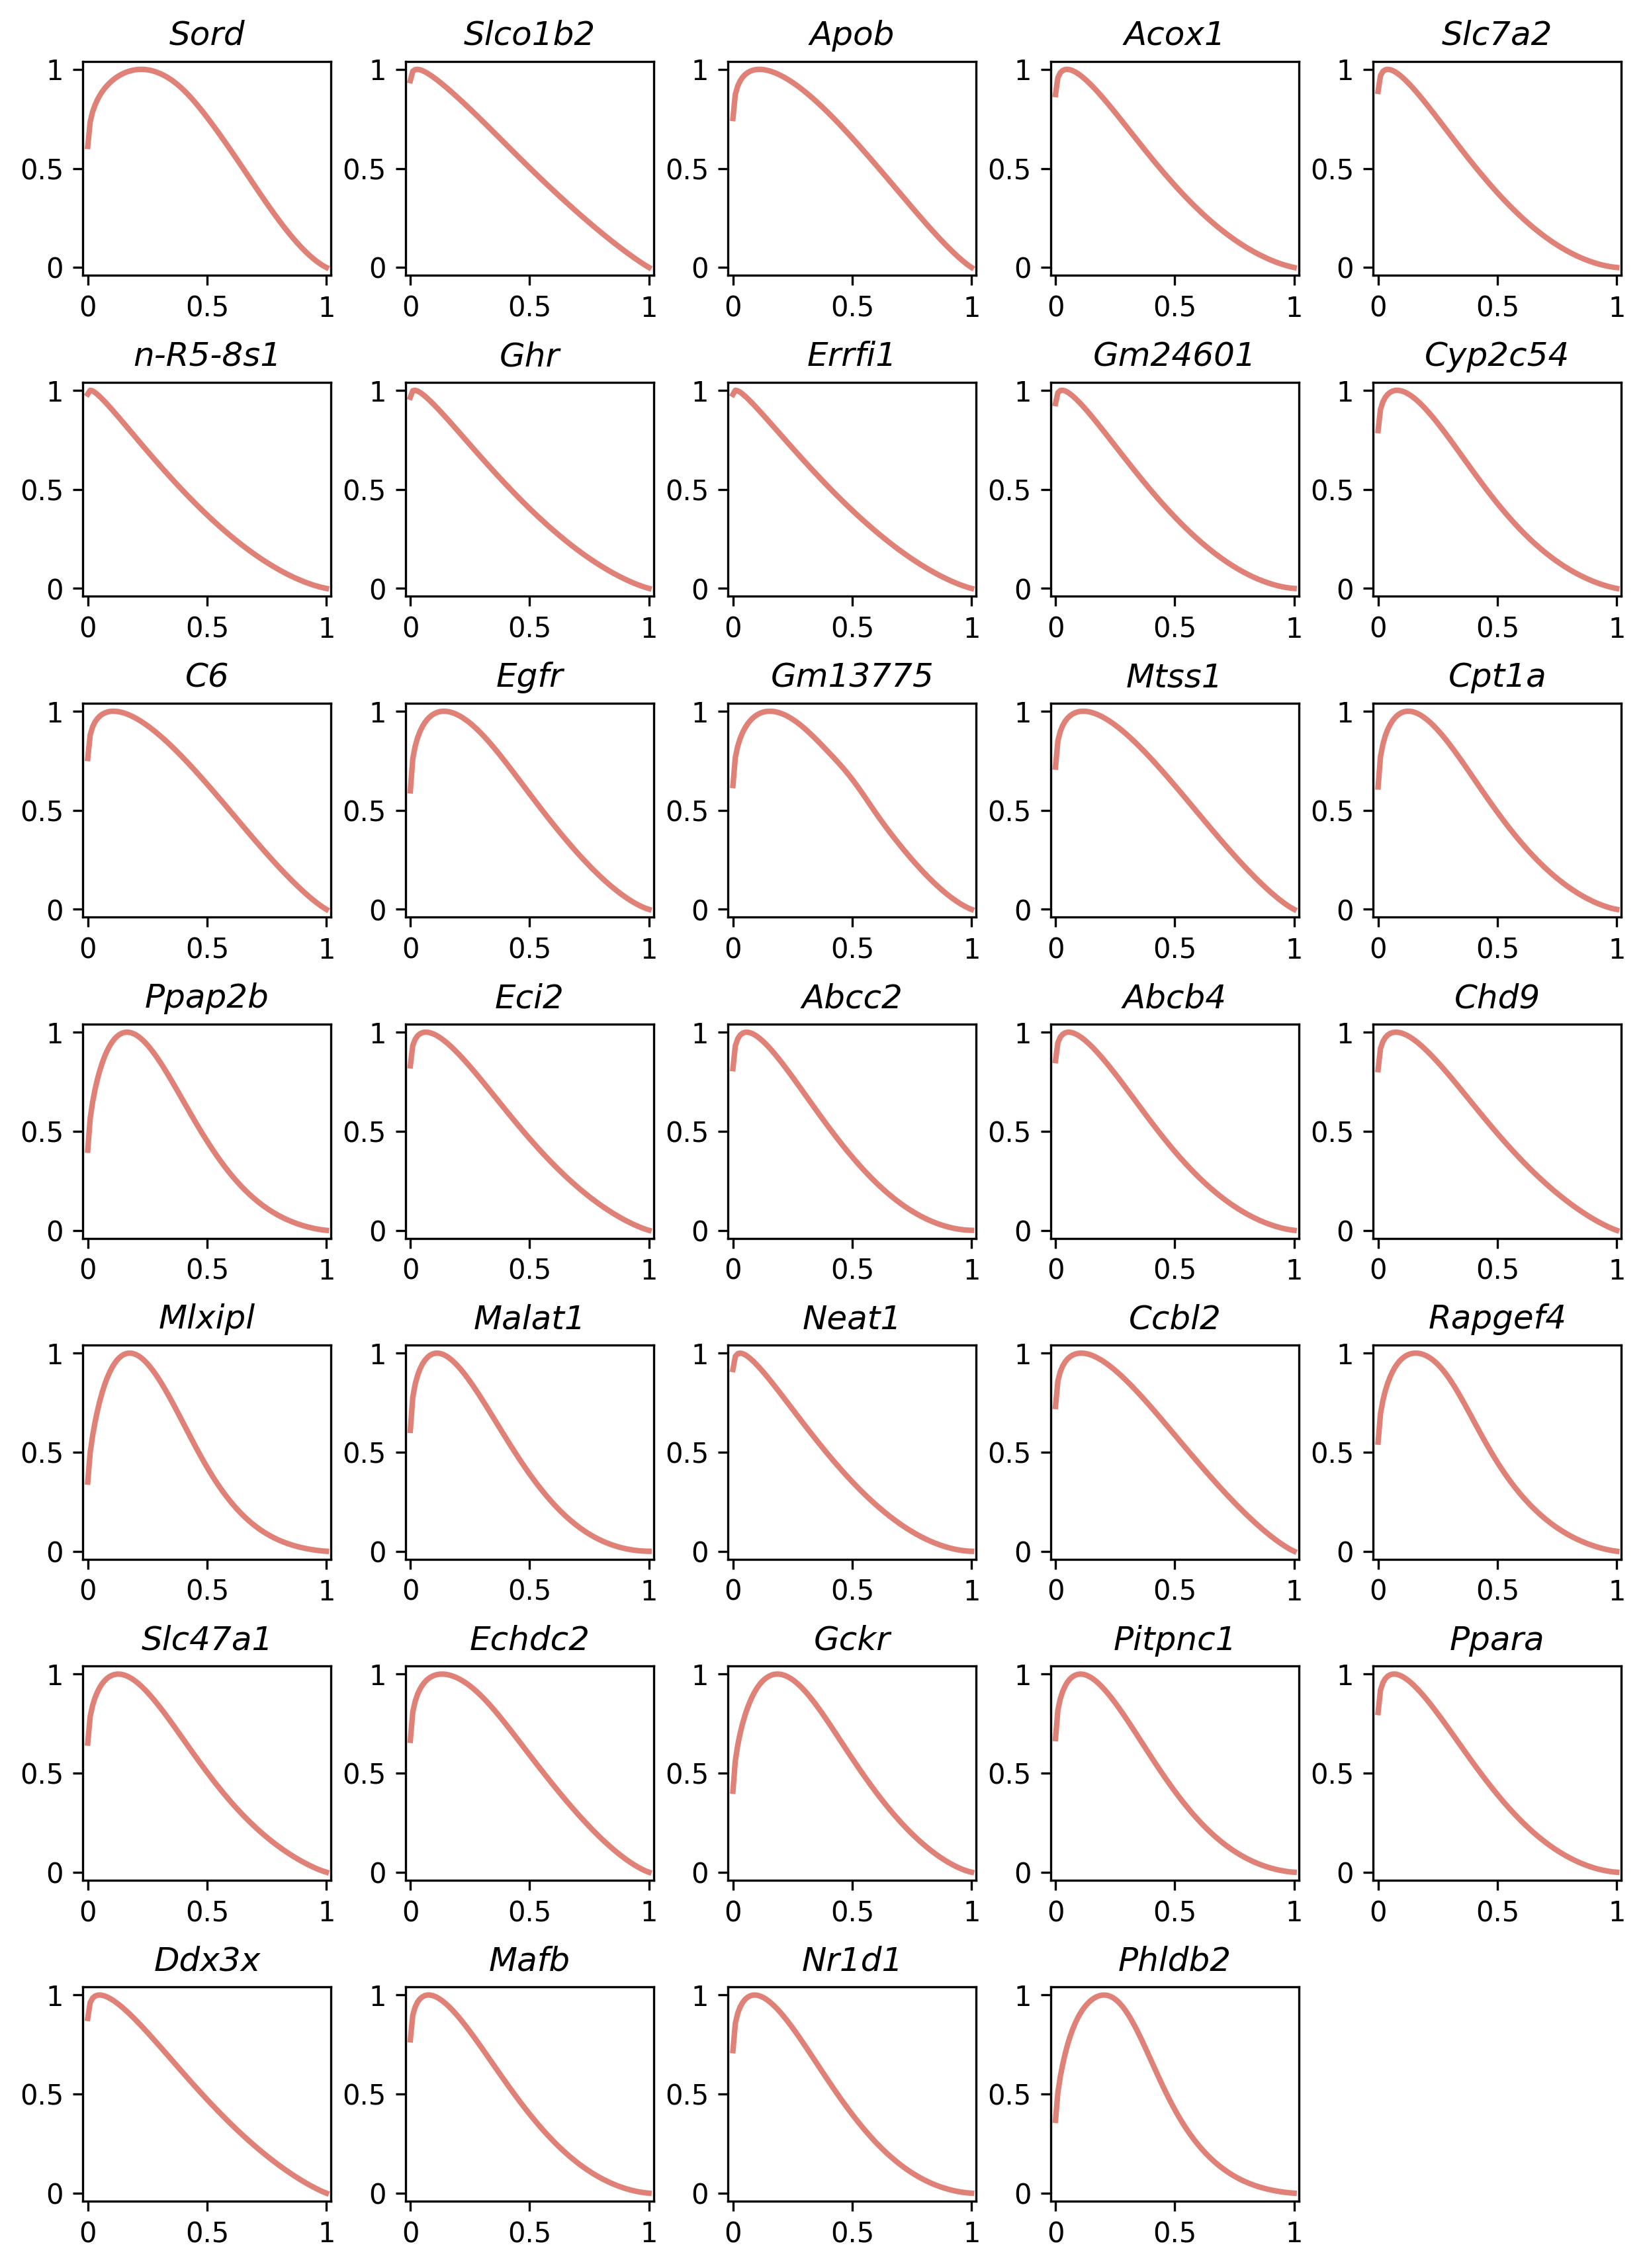

In [20]:
# plot genes_c1 lam
x = np.linspace(0, 1, 100)
color = red
t = 'H1'
genes_t = genes_dict[t]
labels_t = label_dict[t]
lam_t = lam_dict[t]

nr = 7
nc = 5
ss_nc = 2
ss_nr = 2
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.3, hspace=0.5)

for i, g in enumerate(genes_c1):
    ax = plt.subplot(gs[i//nc, i%nc])
    j = np.where(genes_t==g)[0][0]
    lam_g = lam_t[j]
    lam_std_g = (lam_g-np.min(lam_g))/(np.max(lam_g)-np.min(lam_g)) # min-max std
    ax.plot(x, lam_std_g, alpha=0.8, lw=2, color=color)

    ax.set_xlim(-0.02, 1.02)
    ax.set_ylim(-0.04, 1.04)
    __ = ax.set_xticks([0,0.5,1], [0,0.5,1])
    __ = ax.set_yticks([0,0.5,1], [0,0.5,1])
    ax.set_title(g, fontstyle='italic')

In [21]:
# seqscope 10 nuclear genes
seqscope_nuclear10_list = [
    'Neat1', 'Malat1', 'Mlxipl', 'n-R5-8s1', 'Gm24601', 
    'Echdc2', 'D4Wsu53e', 'Aspg', 'Mafb', 'Sema4g'
]
com = list(set(genes_c1) & set(seqscope_nuclear10_list))
print(f'{len(com)}\n{com}')

7
['Neat1', 'n-R5-8s1', 'Echdc2', 'Malat1', 'Mafb', 'Gm24601', 'Mlxipl']


In [22]:
# lnc genes
def parse_gencode_annotation(annotation_file):
    lnc_genes = set()
    with open(annotation_file, 'r') as f:
        for line in f:
            if line.startswith('#'):
                continue
            fields = line.strip().split('\t') 
            if fields[2] == 'gene' and ' gene_type "lncRNA"' in fields[8].split(';'):
                gene_name = fields[8].split(';')[2].split('"')[1]  # Extract gene name
                lnc_genes.add(gene_name)
    return lnc_genes

def check_if_lnc(genes_list, lnc_genes):
    lnc_genes_in_list = [gene for gene in genes_list if gene in lnc_genes]
    return lnc_genes_in_list

annotation_file = 'input/gencode.vM34.annotation.gtf'
lnc_genes = parse_gencode_annotation(annotation_file)

for t in types_list:
    genes_list = np.array(genes_dict[t])[p_fdr_dict[t]<=0.05]
    lnc_genes_in_list = check_if_lnc(genes_list, lnc_genes)
    print(f'{t} #lnc={len(lnc_genes_in_list)}\n{lnc_genes_in_list}')

H1 #lnc=3
['Gm13775', 'Malat1', 'Neat1']
H2 #lnc=3
['Neat1', '0610005C13Rik', 'Malat1']
TD1 #lnc=0
[]
TD2 #lnc=3
['Neat1', 'Malat1', 'Xist']


In [23]:
# check mt genes
t = 'H1'
genes_t = genes_dict[t]
labels_t = label_dict[t]
mt_c1 = []
mt_c1_label = []
for i, g in enumerate(genes_t):
    if g.startswith('mt-'):
        mt_c1.append(g)
        mt_c1_label.append(labels_t[i])
print(f'mt avl={len(mt_c1)}\n{mt_c1}')
for element, count in Counter(mt_c1_label).items():
    print(f"{element}: {count}")
print(f'sig mt {np.array(mt_c1)[np.array(mt_c1_label)!=-1]}')

mt avl=13
['mt-Co1', 'mt-Atp6', 'mt-Nd4', 'mt-Nd2', 'mt-Cytb', 'mt-Co2', 'mt-Co3', 'mt-Nd1', 'mt-Rnr2', 'mt-Nd3', 'mt-Rnr1', 'mt-Nd5', 'mt-Td']
2: 9
-1: 4
sig mt ['mt-Co1' 'mt-Atp6' 'mt-Nd4' 'mt-Cytb' 'mt-Co2' 'mt-Co3' 'mt-Rnr2'
 'mt-Nd3' 'mt-Rnr1']


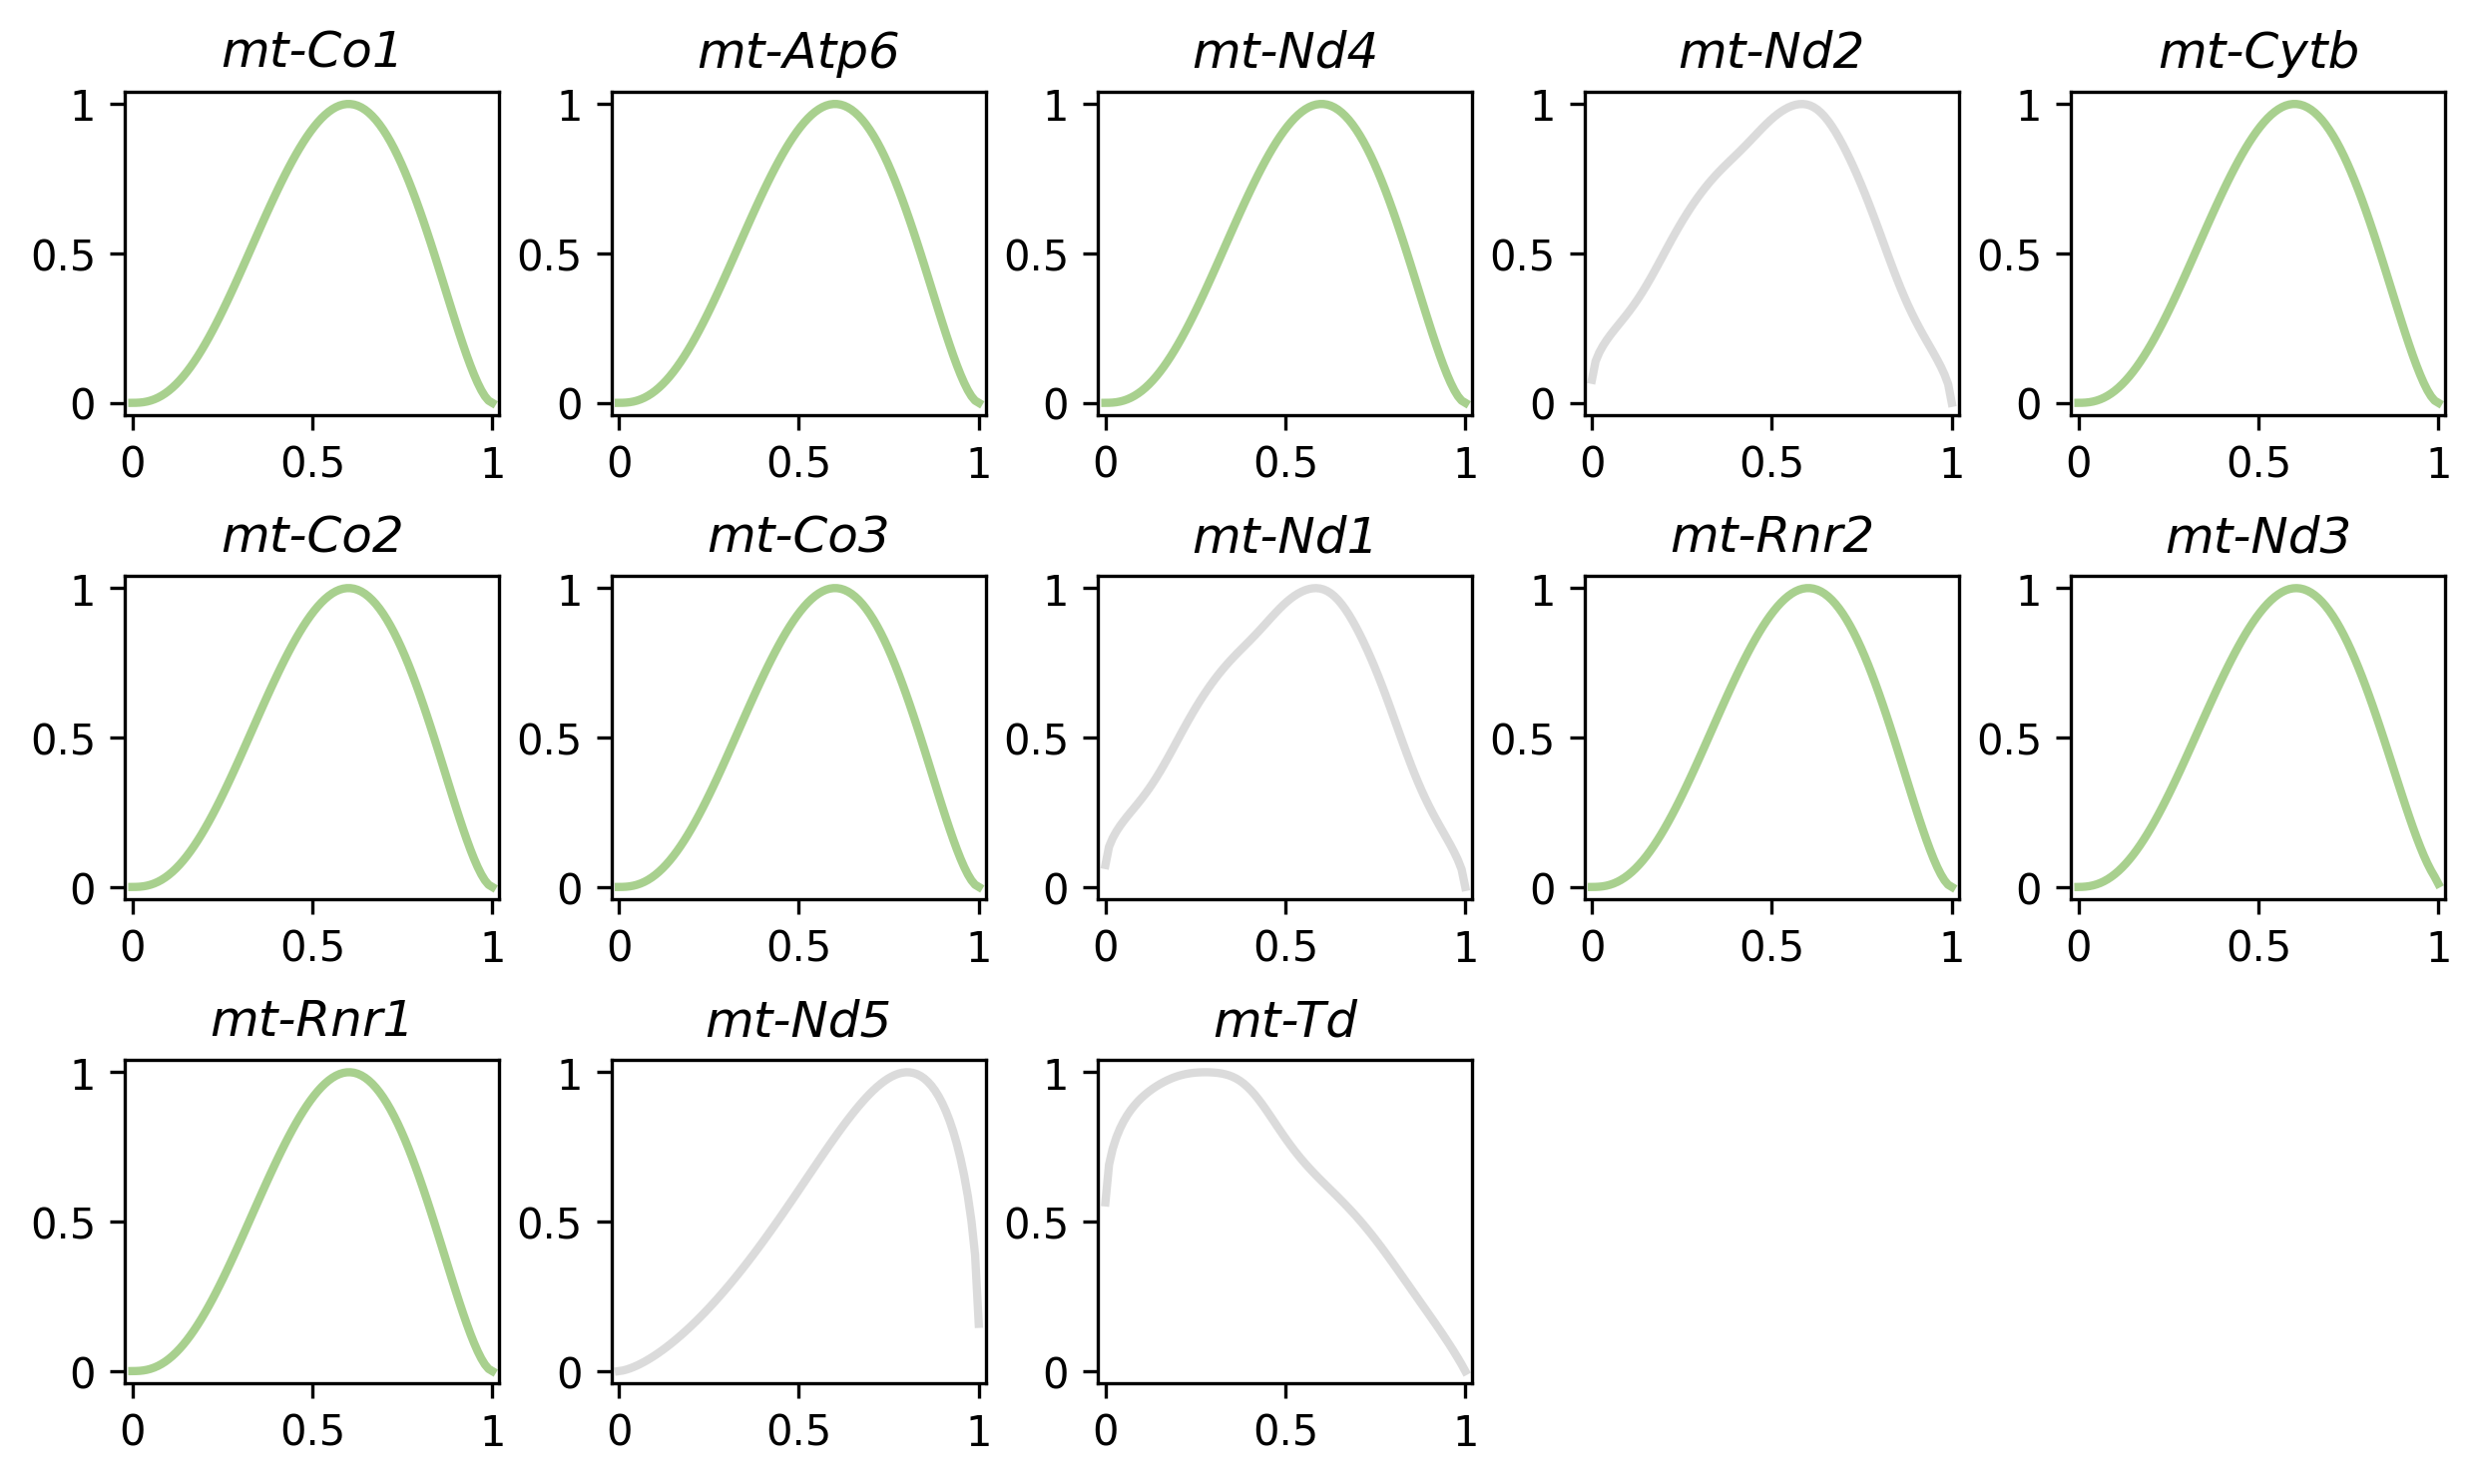

In [38]:
# plot mt_c1 lam
x = np.linspace(0, 1, 100)
# color = darkgray
colors = [red, lightorange, lightgreen, lightblue, darkblue]
t = 'H1'
genes_t = genes_dict[t]
labels_t = label_dict[t]
lam_t = lam_dict[t]

nr = 7
nc = 5
ss_nc = 2
ss_nr = 2
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.3, hspace=0.5)

for i, g in enumerate(mt_c1):
    ax = plt.subplot(gs[i//nc, i%nc])
    j = np.where(genes_t==g)[0][0]
    lam_g = lam_t[j]
    lab_g = labels_t[j]
    lam_std_g = (lam_g-np.min(lam_g))/(np.max(lam_g)-np.min(lam_g)) # min-max std
    if lab_g != -1:
        ax.plot(x, lam_std_g, alpha=0.8, lw=2, color=colors[lab_g])
    else:
        ax.plot(x, lam_std_g, alpha=0.8, lw=2, color=lightgray)

    ax.set_xlim(-0.02, 1.02)
    ax.set_ylim(-0.04, 1.04)
    __ = ax.set_xticks([0,0.5,1], [0,0.5,1])
    __ = ax.set_yticks([0,0.5,1], [0,0.5,1])
    ax.set_title(g, fontstyle='italic')

In [26]:
# check seqsocpe cell type marker genes
PP7_list = ['Mup20', 'Alb', 'Cyp2f2', 'Serpina1e', 'Ass1', 'Hamp', 'Mup11']
PC7_list = ['Glul', 'Oat', 'Cyp2a5', 'Mup9', 'Mup17', 'Cyp2c29', 'Cyp2e1']

t = 'H1'
genes_t = genes_dict[t]
labels_t = label_dict[t]
pc_c1_label = []
for g in PC7_list:
    j = np.where(genes_t==g)[0]
    if len(j)==1:
        pc_c1_label.append(labels_t[j[0]])
    else:
        pc_c1_label.append(-2)
pp_c1_label = []
for g in PP7_list:
    j = np.where(genes_t==g)[0]
    if len(j)==1:
        pp_c1_label.append(labels_t[j[0]])
    else:
        pp_c1_label.append(-2)
        
for element, count in Counter(pc_c1_label).items():
    print(f"{element}: {count}")
print(f'sig pc {np.array(PC7_list)[np.array(pc_c1_label)>-1]} {np.array(pc_c1_label)[np.array(pc_c1_label)>-1]}')

-2: 2
-1: 2
4: 1
2: 2
sig pc ['Mup17' 'Cyp2c29' 'Cyp2e1'] [4 2 2]


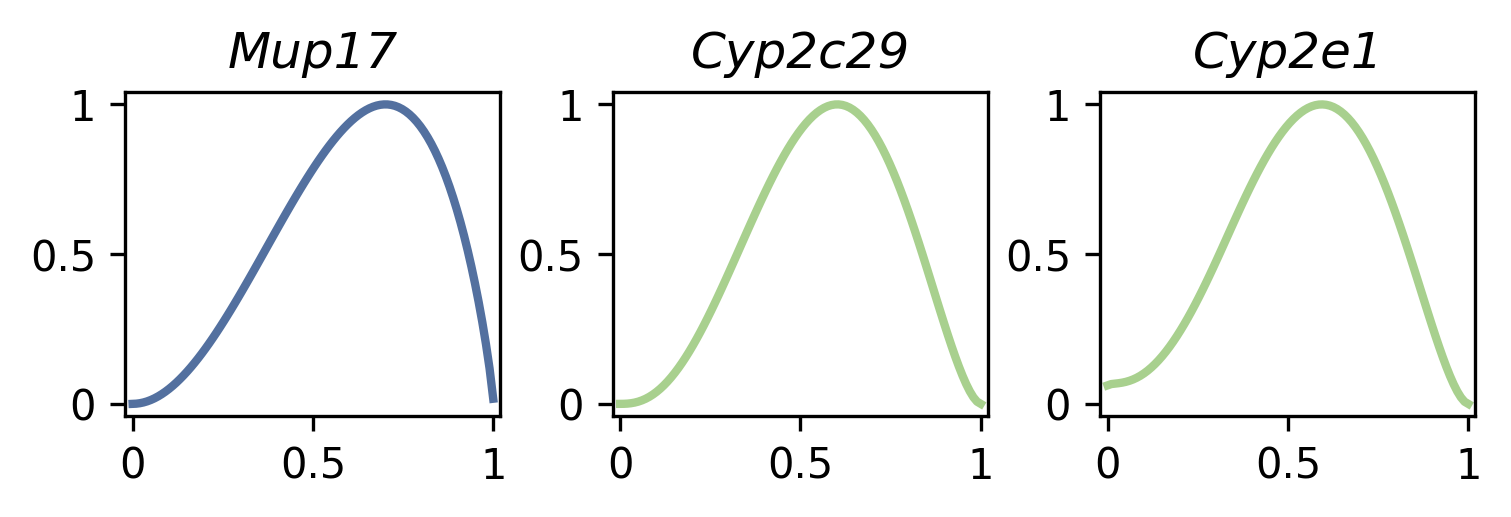

In [36]:
# plot PC7_list lam
x = np.linspace(0, 1, 100)
# color = darkgray
colors = [red, lightorange, lightgreen, lightblue, darkblue]
t = 'H1'
genes_t = genes_dict[t]
labels_t = label_dict[t]
lam_t = lam_dict[t]

nr = 7
nc = 5
ss_nc = 2
ss_nr = 2
fig = plt.figure(figsize=(nc*ss_nc, nr*ss_nr), dpi=300)
gs = fig.add_gridspec(nr,nc,
                      width_ratios=[1]*nc,
                      height_ratios=[1]*nr)
gs.update(wspace=0.3, hspace=0.5)

_gl = np.array(PC7_list)[np.array(pc_c1_label)>=0]

for i, g in enumerate(_gl):
    ax = plt.subplot(gs[i//nc, i%nc])
    j = np.where(genes_t==g)[0][0]
    lam_g = lam_t[j]
    lab_g = labels_t[j]
    lam_std_g = (lam_g-np.min(lam_g))/(np.max(lam_g)-np.min(lam_g)) # min-max std
    ax.plot(x, lam_std_g, alpha=0.8, lw=2, color=colors[lab_g])

    ax.set_xlim(-0.02, 1.02)
    ax.set_ylim(-0.04, 1.04)
    __ = ax.set_xticks([0,0.5,1], [0,0.5,1])
    __ = ax.set_yticks([0,0.5,1], [0,0.5,1])
    ax.set_title(g, fontstyle='italic')

In [29]:
# pattern scores of genes_c1, mt_c1, pp_c1
t = 'H1'
genes_t = genes_dict[t]
labels_t = label_dict[t]
scores_t = score_dict[t]

score_nuclear = []
score_mt = []
score_pp = []

for g in genes_c1:
    if g in genes_t:
        i = np.where(g==genes_t)[0][0]
        if labels_t[i]>=0:
            score_nuclear.append(scores_t[i])
        
for g in mt_c1:
    if g in genes_t:
        i = np.where(g==genes_t)[0][0]
        if labels_t[i]>=0:
            score_mt.append(scores_t[i])
        
for g in PC7_list:
    if g in genes_t:
        i = np.where(g==genes_t)[0][0]
        if labels_t[i]>=0:
            score_pp.append(scores_t[i])
            
score_nuclear = np.array(score_nuclear)
score_mt = np.array(score_mt)
score_pp = np.array(score_pp)